# Maximum-likelihood estimate for mean lifetime in radiactive decay

### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


### a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay

The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$




$\ln L(\tau) = \sum_{i=1}^n \ln \left(\frac{1}{\tau} e^{-t_i/\tau}\right) =  - n\ln\tau - \frac{1}{\tau}\sum_{i=1}^n t_i$

$$\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} = \frac{n}{\tau^2} - \frac{2}{\tau^3} \hat{\tau} n \Big|_{\tau = \hat \tau} = - \frac{n}{\hat{\tau}^2}$$

$$\Rightarrow \sigma_\tau^2 = \left(\frac{n}{\hat{\tau}^2}\right)^{-1} \Rightarrow \sigma_\tau = \frac{\hat \tau}{\sqrt{n}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### b) log-likelihood function

Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

In [2]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

In [3]:
np.random.seed(0)
data30, data300 = generate_data(2, 30), generate_data(2, 300)

In [4]:
def loglikelihood(tau, data):
    return -len(data)*np.log(tau) - (1/tau) * np.sum(data)

def approx(tau, Lmax, guess, sigma):
    return Lmax - (tau - guess)**2 / (2*sigma**2)

tau30 = np.mean(data30)
tau300 = np.mean(data300)
sigma_tau30 = tau30 / np.sqrt(30)
sigma_tau300 = tau300 / np.sqrt(300)

Lmax30 = loglikelihood(tau30, data30)
Lmax300 = loglikelihood(tau300, data300)

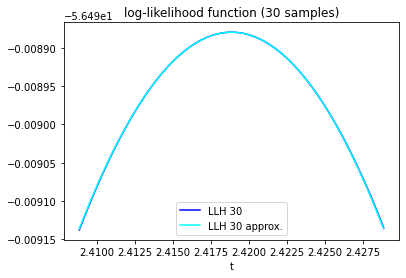

In [5]:
#30 samples
tau_line0 = np.linspace(tau30-0.01,tau30+0.01,100)

plt.plot(tau_line0, loglikelihood(tau_line0, data30), color='blue', label='LLH 30')
plt.plot(tau_line0, approx(tau_line0, Lmax30, tau30, sigma_tau30), color='cyan', label='LLH 30 approx.')
plt.legend()
plt.title('log-likelihood function (30 samples)')
plt.xlabel('t')
plt.show()

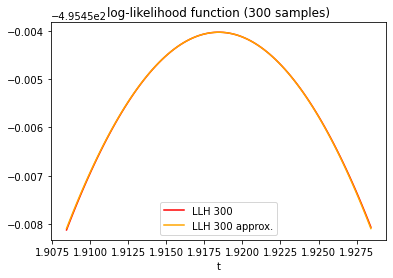

In [6]:
#300 samples
tau_line1 = np.linspace(tau300-0.01,tau300+0.01,100)
plt.plot(tau_line1, loglikelihood(tau_line1, data300), color='red', label='LLH 300')
plt.plot(tau_line1, approx(tau_line1, Lmax300, tau300, sigma_tau300),color='orange', label='LLH 300 approx.')
plt.legend()
plt.title('log-likelihood function (300 samples)')
plt.xlabel('t')
plt.show()

In [7]:
#comparison of the quality of the approximation
diff30 = np.sum((loglikelihood(tau_line0, data30) - approx(tau_line0, Lmax30, tau30, sigma_tau30))**2) / len(tau_line0)
diff300 = np.sum((loglikelihood(tau_line1, data300) - approx(tau_line1, Lmax300, tau300, sigma_tau300))**2) / len(tau_line1)
print(f'squared difference for 30:\t {diff30}')
print(f'squared difference for 300:\t {diff300}')

squared difference for 30:	 3.0283416192470175e-13
squared difference for 300:	 1.2167153421871113e-10


Close around the maximum both approximations are good, however for fewer samples the approximation is better (factor $10^3$)

### c) Data generation

Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?

In [8]:
np.random.seed(0)
data = np.array([generate_data(2, 500) for _ in range(1000)])

tau_guess = np.mean(data, axis=1)
sigma_guess = tau_guess / np.sqrt(500)

difference = np.abs(tau_guess - 2)
print(f'{np.count_nonzero(difference < sigma_guess)/1000*100} %')

69.6 %


This is what we would expect: for n$\rightarrow \infty$: 68.3\% as the data has gaussian distribution.